# Solving the n-Queens Problem using Local Search

## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file. 


## The n-Queens Problem

* __Goal:__ Find an arrangement of $n$ queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

* __State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We represent a state as an integer vector $\mathbf{q} = \{q_1, q_2, \dots, q_n\}$, each number representing the row positions of the queens from left to right. We will call a state a "board."

* __Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).
The optimization problem is to find the optimal arrangement $\mathbf{q}^*$ of $n$ queens on the board can be written as:

  > minimize: $\mathrm{conflicts}(\mathbf{q})$
  >
  > subject to: $\mathbf{q} \ \text{contains only one queen per column}$

  Note: the constraint (subject to) is enforced by the definition of the state space.

* __Local improvement move:__ Move one queen to a different row in its column.

* __Termination:__ For this problem there is always an arrangement $\mathbf{q}^*$ with $\mathrm{conflicts}(\mathbf{q}^*) = 0$, however, the local improvement moves might end up in a local minimum. 

## Helper functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

np.random.seed(1234)


def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""
    
    return(np.random.randint(0,n, size = n))

def comb2(n): return n*(n-1)//2 # this is n choose 2 equivalent to math.comb(n, 2); // is int division

def conflicts(board):
    """Caclulate the number of conflicts, i.e., the objective function."""

    n = len(board)
    
    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * 2 * n
    diagonal2_cnt = [0] * 2 * n
    
    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n] += 1
    
    return sum(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))


def show_board(board, cols = ['white', 'gray'], fontsize = 48):  
    """display the board"""
    
    n = len(board)
    
    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0): 
                display[i,j] = 1
    
    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap, 
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])
    
    # place queens. Note: Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = fontsize, 
                 horizontalalignment = 'center',
                 verticalalignment = 'center')
    
    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

## Create a board

Board with 4 conflicts.


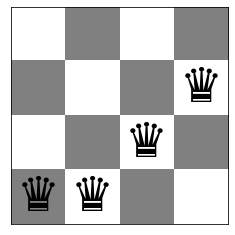

Queens (left to right) are at rows: [3 3 2 1]
Number of conflicts: 4


In [2]:
board = random_board(4)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

A board $4 \times 4$ with no conflicts:

Board with 0 conflicts.


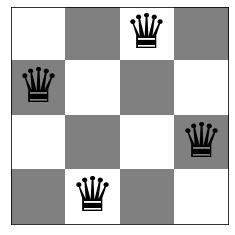

In [3]:
board = [1,3,0,2]
show_board(board)

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

## Task 1: Steepest-ascend Hill Climbing Search [30 Points]

Calculate the objective function for all local moves (see definition of local moves above) and always choose the best among all local moves. If there are no local moves that improve the objective, then you have reached a local optimum. 

In [4]:
# Code and description go here

def local_move_steepest(board):
    n = len(board)
    minconflicts = float('inf')
    res = []
    
    # Check all local moves
    for index in range(n):
        # reset neighbor board to current board
        neighbor = board.copy()
        for row in range(n):
            # not same as current board
            if row != board[index]:
                # local move
                neighbor[index] = row
                obj = conflicts(neighbor)
                # choose the best among all local moves
                if  obj < minconflicts:
                    res = neighbor.copy()
                    minconflicts = obj  
    return res
    
# Steepest ascend hill climbing
def steepest_ascend_hill(startboard):
    current = startboard
    while True:
        # get the best move among all local moves
        neighbor = local_move_steepest(current)
        # whether this move improved the objective(current board)
        if conflicts(neighbor) >= conflicts(current):
            return current
        # print("neighbor:",conflicts(neighborboard),"current",conflicts(currentboard))
        current = neighbor
        


Board with 4 conflicts.


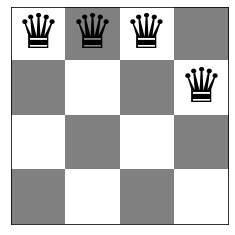

Board with 0 conflicts.


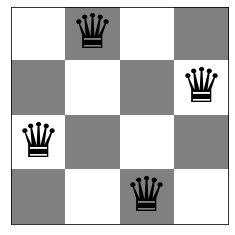

In [5]:
board = random_board(4)
show_board(board)
res = steepest_ascend_hill(board)
show_board(res)

## Task 2: Stochastic Hill Climbing 1 [10 Points]

Chooses randomly from among all uphill moves till you have reached a local optimum.

In [6]:
# Code and description go here

def local_move_stochastic(board):
    
    n = len(board)
    currentconflicts = conflicts(board)
    res = []
    
    # check all local moves
    for index in range(n):
        # reset neighbor board to current board
        neighbor = board.copy()
        for row in range(n):
            # not same as current board
            if row != board[index]:
                neighbor[index] = row
                obj = conflicts(neighbor)
                # save uphill moves
                if  obj < currentconflicts:
                    res.append(neighbor.copy())
    # found uphill move(s)                
    if len(res)!= 0:
        # choose randomly among all uphill move(s)
        return res[np.random.randint(0,len(res))]
    else:
        return np.array(res)
    

def stochastic_hill(startboard):
    current = startboard
    while True:
        # choose randomly among all uphill moves
        neighbor = local_move_stochastic(current)
        # this move can not improve current objective function or no uphill move anymore
        if conflicts(neighbor) >= conflicts(current) or neighbor.size == 0:
            return current
        # whether this move improved the objective(current board)
        current = neighbor

Board with 2 conflicts.


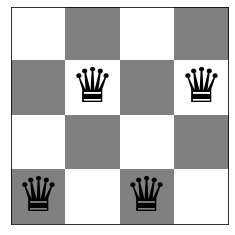

Board with 0 conflicts.


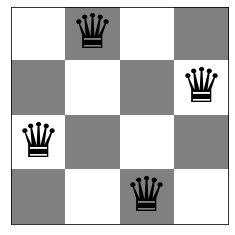

In [7]:
board = random_board(4)
show_board(board)
res = stochastic_hill(board)
show_board(res)

## Task 3: Stochastic Hill Climbing 2 [20 Points]

A popular version of stochastic hill climbing generates only a single random local neighbor at a time and accept it if it has a better objective function value than the current state. This is very efficient if each state has many possible successor states. This method is called "First-choice hill climbing" in the textbook.

__Notes:__ 

* Detecting local optima is tricky! You can, for example, stop if you were not able to improve the objective function during the last $x$ tries.

In [8]:
# Code and description go here

def local_move_first_choice(board):
    
    n = len(board)
    neighbor = board.copy()
    
    # generate randomly one new successor
    index = np.random.randint(0,n)
    row = np.random.randint(0,n)
    
    # if same as current board, random again until find a different one
    while row == board[index]:
        row = np.random.randint(0,n)
        
    neighbor[index] = row
    return neighbor
                
    
# First-choice hill climbing
def first_choice_hill(startboard):
    # number of attempts
    N = 10000
    current = startboard
    count = 0
    while count < N:
        count += 1
        # generate randomly one new successor
        neighbor = local_move_first_choice(current)
        
        # found a better one
        if conflicts(neighbor) <= conflicts(current):
            current = neighbor
        # found the best solution(conflicts == 0)
        if conflicts(current) == 0:
            return current
    # The number of attempts has been used up
    return current

Board with 5 conflicts.


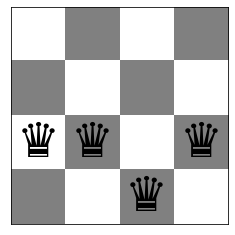

Board with 0 conflicts.


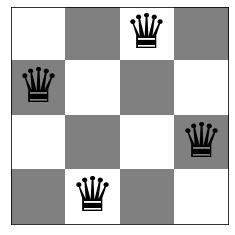

In [9]:
board = random_board(4)
show_board(board)
res = first_choice_hill(board)
show_board(res)

## Task 4: Hill Climbing Search with Random Restarts [10 Points]

Hill climbing will often end up in local optima. Restart the each of the three hill climbing algorithm up to 100 times with a random board to find a better (hopefully optimal) solution. Note that restart just means to run the algoithm several times starting with a new random board.

In [10]:
# Code and description go here

# Random-restart hill climbing 
# n - size of board  times - restarts times
def random_restart_hill(n,times):
    
    board = random_board(n)
    hill1, hill2, hill3 = [],[],[]
    
    # use to save the best solution
    bestSolution = board
    bestObj = conflicts(board)
    solution = ""
    
    for i in range(times):
        board = random_board(n)
        show_board(board)
        
        hill1 = steepest_ascend_hill(board)
        hill2 = stochastic_hill(board)
        hill3 = first_choice_hill(board)
        
        obj1 = conflicts(hill1)
        obj2 = conflicts(hill2)
        obj3 = conflicts(hill3)
        
        # check whether found a better solution
        if obj1 < bestObj:
            bestSolution = hill1
            bestObj = obj1
            solution = "steepest ascent hill"
      
        if obj2 < bestObj:
            bestSolution = hill2
            bestObj = obj2
            solution = "stochastic hill"
            
        if obj3 < bestObj:
            bestSolution = hill3
            bestObj = obj3
            solution = "first choice hill"
            
        # if found the best solution
        if bestObj == 0:
            # Test
            print("Find best solution by",solution,"in times",i)
            show_board(bestSolution)
            return bestSolution
        
        board = random_board(n)
    # Test
    print("Already tried input times")
    show_board(bestSolution)
    return bestSolution
        


Board with 47 conflicts.


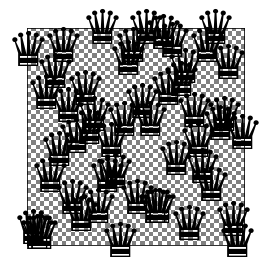

Board with 58 conflicts.


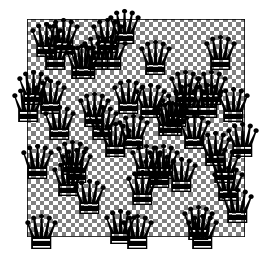

Board with 39 conflicts.


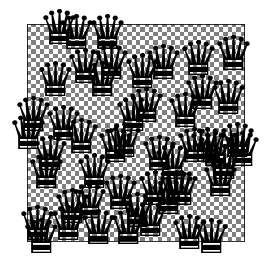

Board with 57 conflicts.


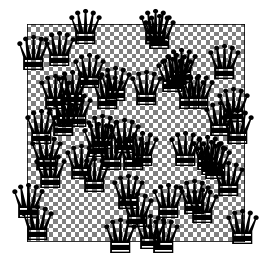

Board with 58 conflicts.


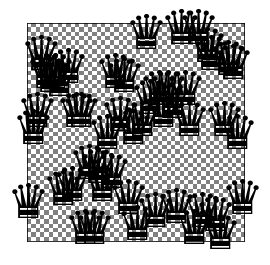

Board with 63 conflicts.


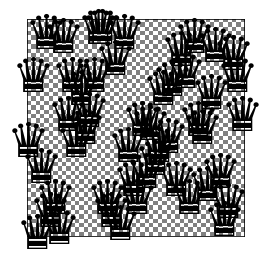

Board with 52 conflicts.


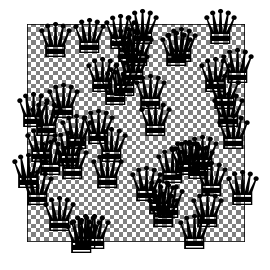

Board with 56 conflicts.


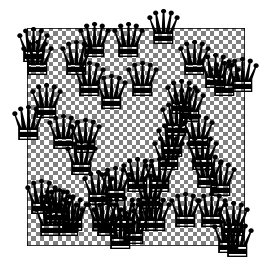

Board with 57 conflicts.


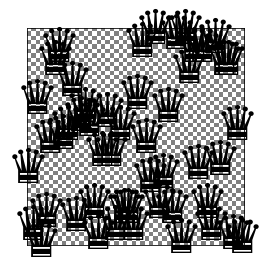

Find best solution by first choice hill in times 8
Board with 0 conflicts.


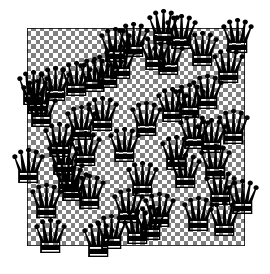

array([32, 14, 16, 19, 40, 48, 13, 26, 30, 34, 36, 12, 22, 28, 38, 11, 49,
       20, 10, 47,  4,  8, 27, 41,  3, 46, 35, 21, 45,  6, 42,  0,  7, 18,
       29,  1, 33, 17, 24, 43,  5, 15, 25, 31, 37, 44,  9, 23,  2, 39])

In [11]:
random_restart_hill(50,100)

## Task 5: Compare Performance [20 Points]

Use runtime and objective function value to compare the algorithms. 

* Use boards of different sizes to explore how the different algorithms perform. Make sure that you run the algorithms for each board size several times (at least 10 times) with different starting boards and report averages.

* How do the algorithms scale with problem size? Use tables and charts.

* What is the largest board each algorithm can solve in a reasonable amount time?

See [Profiling Python Code](../Python_Code_Examples/profiling_code.ipynb) for help about how to measure runtime in Python.

In [12]:
# Code, results, charts and discussion go here

import time
import pandas as pd
import matplotlib.pyplot as plt



def compare(n,N):

    for i in range(N):
        board = random_board(n)
        
        t0 = time.time()
        objective['steepest_ascend_hill'][i] = conflicts(steepest_ascend_hill(board))
        t1 = time.time()
        objective['stochastic_hill'][i] = conflicts(stochastic_hill(board))
        t2 = time.time()
        objective['first_choice_hill'][i] = conflicts(first_choice_hill(board))
        t3 = time.time()
        
        runtime['steepest_ascend_hill'][i] = round((t1-t0)*1e3,3)
        runtime['stochastic_hill'][i] = round((t2-t1)*1e3,3)
        runtime['first_choice_hill'][i] = round((t3-t2)*1e3,3)
          
    return objective,runtime
        
def show_performance(n,N):
    
    objective,runtime = compare(n,N)
 
    objective = pd.DataFrame(objective)
    # print(objective)
    print("----------",n,"*",n,"----------")

    means = np.mean(objective)
    print("-----Objective function-----")
    print(means)

    plt.bar(means.keys(), means)
    plt.ylabel("mean objective function")
    plt.show()
    
    plt.hist(objective['steepest_ascend_hill'], bins = 20, alpha = .5)
    plt.hist(objective['stochastic_hill'], bins = 20, alpha = .5)
    plt.hist(objective['first_choice_hill'], bins = 20, alpha = .5)
    plt.xlabel("objective founction")
    plt.ylabel("frequency")
    plt.legend(labels = ["steepest_ascend_hill", "stochastic_hill", "first_choice_hill"])
    plt.show()

    print("-----Runtime-----")
    runtime = pd.DataFrame(runtime)
    # print(runtime)
    means = np.mean(runtime, axis = 0)
    
    print(means)

    plt.bar(means.keys(), means)
    plt.ylabel("mean runtime")
    plt.show()
    


__Description:__

In the performance comparasion part, I choose 5 diffenent board size which are 10 * 10, 20 * 20, 40 * 40, 80 * 80. We can say that problem size of board 40 * 40 is twice as much as problem size of board 20 * 20. So, If we compare the runtime for one algorithm to solve these two boards, we can easily find how problem size influent algorithm's performance.

---------- 10 * 10 ----------
-----Objective function-----
steepest_ascend_hill    1.5
stochastic_hill         1.6
first_choice_hill       0.1
dtype: float64


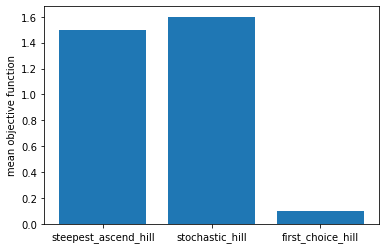

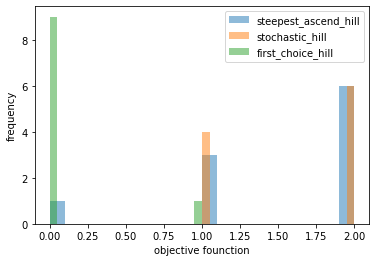

-----Runtime-----
steepest_ascend_hill      7.1004
stochastic_hill          11.2067
first_choice_hill       137.5994
dtype: float64


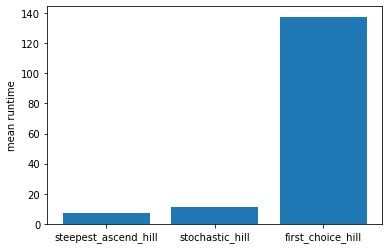

In [13]:
# def show_performance(n,N)
# n - board size
# N - times

N = 10

runtime = {
    'steepest_ascend_hill' : np.zeros(shape = [N]),
    'stochastic_hill' : np.zeros(shape = [N]),
    'first_choice_hill' : np.zeros(shape = [N]),
}

objective = {
    'steepest_ascend_hill' : np.zeros(shape = [N]),
    'stochastic_hill' : np.zeros(shape = [N]),
    'first_choice_hill' : np.zeros(shape = [N]),
} 


show_performance(10,N)

---------- 20 * 20 ----------
-----Objective function-----
steepest_ascend_hill    2.1
stochastic_hill         2.2
first_choice_hill       0.3
dtype: float64


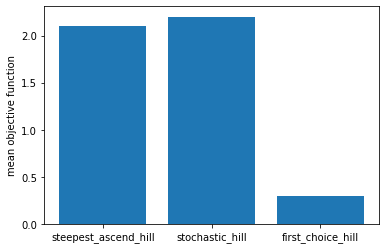

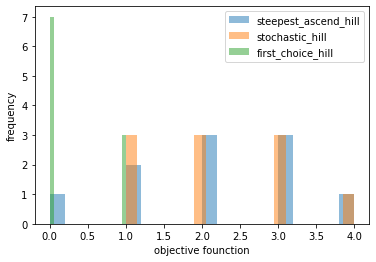

-----Runtime-----
steepest_ascend_hill     98.0022
stochastic_hill         157.4650
first_choice_hill       526.1898
dtype: float64


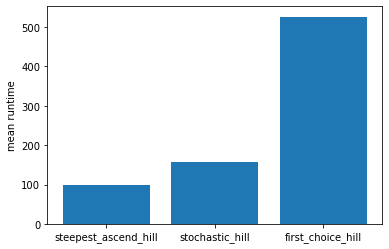

In [14]:

N = 10

runtime = {
    'steepest_ascend_hill' : np.zeros(shape = [N]),
    'stochastic_hill' : np.zeros(shape = [N]),
    'first_choice_hill' : np.zeros(shape = [N]),
}

objective = {
    'steepest_ascend_hill' : np.zeros(shape = [N]),
    'stochastic_hill' : np.zeros(shape = [N]),
    'first_choice_hill' : np.zeros(shape = [N]),
} 

show_performance(20,N)

---------- 40 * 40 ----------
-----Objective function-----
steepest_ascend_hill    2.9
stochastic_hill         4.2
first_choice_hill       0.5
dtype: float64


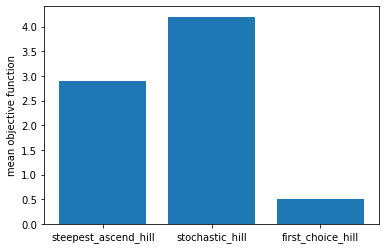

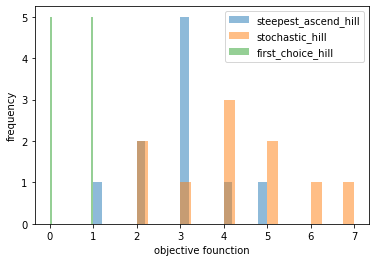

-----Runtime-----
steepest_ascend_hill    1418.6989
stochastic_hill         2428.3380
first_choice_hill       1294.3259
dtype: float64


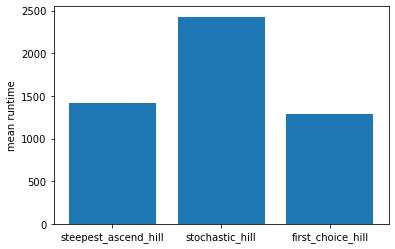

In [15]:
N =10

runtime = {
    'steepest_ascend_hill' : np.zeros(shape = [N]),
    'stochastic_hill' : np.zeros(shape = [N]),
    'first_choice_hill' : np.zeros(shape = [N]),
}

objective = {
    'steepest_ascend_hill' : np.zeros(shape = [N]),
    'stochastic_hill' : np.zeros(shape = [N]),
    'first_choice_hill' : np.zeros(shape = [N]),
} 
show_performance(40,N)

---------- 80 * 80 ----------
-----Objective function-----
steepest_ascend_hill    4.3
stochastic_hill         4.4
first_choice_hill       2.4
dtype: float64


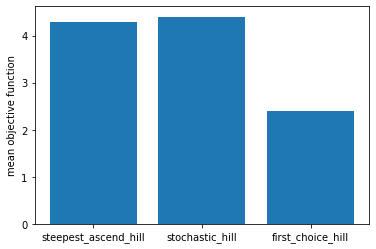

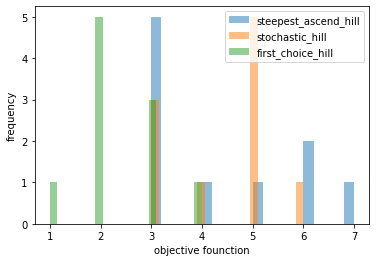

-----Runtime-----
steepest_ascend_hill    20851.7069
stochastic_hill         39771.3607
first_choice_hill        2892.5371
dtype: float64


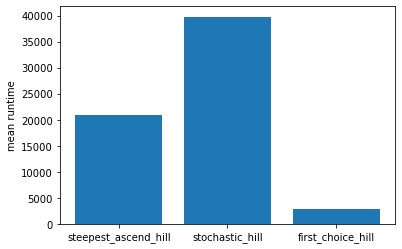

In [16]:
N = 10

runtime = {
    'steepest_ascend_hill' : np.zeros(shape = [N]),
    'stochastic_hill' : np.zeros(shape = [N]),
    'first_choice_hill' : np.zeros(shape = [N]),
}

objective = {
    'steepest_ascend_hill' : np.zeros(shape = [N]),
    'stochastic_hill' : np.zeros(shape = [N]),
    'first_choice_hill' : np.zeros(shape = [N]),
} 
show_performance(80,N)

__Conclusion:__

As the problem size becomes to n times, runtime of steepest-ascend hill climbing and stochastic hill climbing always becomes to n^3 times. While runtime of first choice hill climbing becomes to n times. We can get the conclusion that first choice hill climbing always scales linear with the growth of problem size.

And through the histogram graph of runtime and objective function, we can see that first choice hill climbing always performs well to find the best solution within less amount of runtime. Although in smaller board it costs more time than other two, while problem become more difficult its advantages will become apparent.

__Answer: largest board each algorithm can solve in a reasonable amount time__

In this part, I define a reasonable time to be aound 60 seconds, and run all three algorithms on the board as large as I can without breaking the time limit.

In [17]:
n = 110
board = random_board(n)

%time steepest_ascend_hill(board)

CPU times: user 1min 21s, sys: 117 ms, total: 1min 21s
Wall time: 1min 22s


array([ 69,  12,  34,  38,  81,  21,   2,  33,  49,  53,  56,  84,  68,
        10,  95,  35,   9,  65,   1,  46,  43,  63,  39,  76,  18,  20,
        55,   4,  47,  50,   0,   7,  89,  70,  93,  41, 100,  98,  30,
       104,   3,  42,  92,  86,  75,  94,  28,  85, 108,  73, 101,  36,
        52,  11,   5,  59,  96,  87,  91,  72,  48,  32,   8,  61,  26,
        77,  88,  66,  99, 103,  24,  57,  40,  64,  83,  22,  15, 102,
        23,  27,  37,  17,  31,   6,  71,  17,  60,  54,  22,  29,  74,
       105,  97,  82,  13,  25,  51, 107,  79,  16,  90,  44,  58,  67,
       106,  78,  19, 109,  45,  14])

In [18]:
n = 100
board = random_board(n)

%time stochastic_hill(board)

CPU times: user 1min 40s, sys: 263 ms, total: 1min 41s
Wall time: 1min 41s


array([87, 42,  4, 58, 51, 16, 27, 15, 81, 90, 30, 54, 73, 82, 38, 29, 44,
       24, 88, 71, 33, 99, 37, 89,  0, 17, 13, 69,  8, 92, 74,  9, 25, 91,
       67, 84, 96, 11, 70, 79,  6, 97, 40, 11, 49, 57, 46, 26, 94, 85, 22,
       32, 62, 23, 31, 86, 94, 66, 10, 56, 86, 83, 48, 64,  7, 82, 39, 50,
       18,  5, 93, 60, 19, 55, 77,  2, 80, 72,  3,  1, 68, 52, 98, 14, 78,
       75, 43, 20, 47, 65, 35, 76, 34, 28, 45, 21, 63, 12, 59, 95])

In [19]:
n = 2000
board = random_board(n)

%time first_choice_hill(board)

CPU times: user 1min 10s, sys: 101 ms, total: 1min 10s
Wall time: 1min 11s


array([1325,  822, 1639, ...,  122, 1777,  555])

## Graduate student advanced task: Simulated Annealing [10 Points]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus Points].

Simulated annealing is a form of stochastic hill climbing that avoid local optima by also allowing downhill moves with a probability proportional to a temperature. The temperature is decreased in every iteration following an annealing schedule. You have to experiment with the annealing schedule (Google to find guidance on this).


1. Implement simulated annealing for the n-Queens problem.
2. Compare the performance with the previous algorithms. 
2. Discuss your choice of annealing schedule.

In [20]:
def schedule(t,T0,alpha):
    return (T0 * alpha ** t)

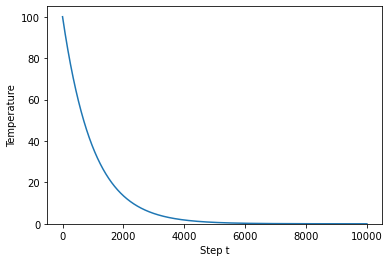

In [21]:
ts = range(0,10000)
plt.plot(ts, [schedule(t, 100, 0.999) for t in ts])
plt.xlabel("Step t")
plt.ylabel("Temperature")
plt.ylim(bottom = 0)
plt.show()

In [22]:
# Code and description go here
import math
    
def simulated_annealing(startboard,T0 = None, alpha = 0.999, epsilon = 1e-3,ishistory = False):

    current = startboard
    current_conflicts = conflicts(startboard)
    n = len(startboard)
    
    if ishistory: history = list()
    
    # set start temperature used the board size 2*n which is an upper limit for delta
    if T0 is None:
        T0 = 2*n
    T = T0
    t = 0
    
    while T > epsilon:
        
        # calculate temperature from schedule
        T = schedule(t,T0,alpha)
        
        # generate randomly one new successor
        neighbor = local_move_first_choice(current)
        
        new_conflicts = conflicts(neighbor)
        delta_conflicts =  new_conflicts - current_conflicts
        
        # found the best solution
        if new_conflicts == 0:
            if ishistory: 
                return current, history
            return neighbor
        
        # check if the new successor is better
        if delta_conflicts < 0 or np.random.rand() < math.exp(-delta_conflicts/T):
            current = neighbor
            current_conflicts = new_conflicts

        if ishistory: history.append(current_conflicts)
        t += 1
    
    if ishistory: 
        return current, history
    return current
        

Board with 9 conflicts.


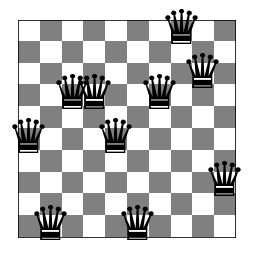

Board with 1 conflicts.


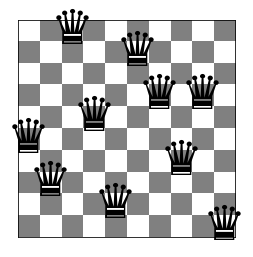

In [31]:
board = random_board(10)
show_board(board)
res, history = simulated_annealing(board,ishistory = True)
show_board(res)

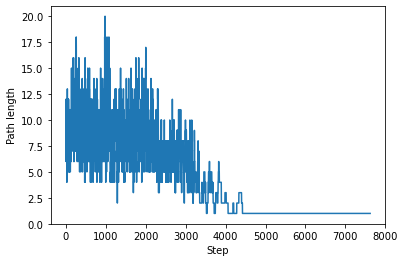

In [32]:
plt.plot(range(len(history)), history)
plt.xlabel("Step")
plt.ylabel("Path length")
plt.ylim(bottom = 0)
plt.show()

In [25]:
runtime = {
    'steepest_ascend_hill' : np.zeros(shape = [N]),
    'stochastic_hill' : np.zeros(shape = [N]),
    'first_choice_hill' : np.zeros(shape = [N]),
    'simulated_annealing' : np.zeros(shape = [N])
}

objective = {
    'steepest_ascend_hill' : np.zeros(shape = [N]),
    'stochastic_hill' : np.zeros(shape = [N]),
    'first_choice_hill' : np.zeros(shape = [N]),
    'simulated_annealing' : np.zeros(shape = [N])
} 


def compare2(n,N):
    for i in range(N):
        board = random_board(n)
        
        t0 = time.time()
        objective['steepest_ascend_hill'][i] = conflicts(steepest_ascend_hill(board))
        t1 = time.time()
        objective['stochastic_hill'][i] = conflicts(stochastic_hill(board))
        t2 = time.time()
        objective['first_choice_hill'][i] = conflicts(first_choice_hill(board))
        t3 = time.time()
        objective['simulated_annealing'][i] = conflicts(simulated_annealing(board))
        t4 = time.time()
        
        runtime['steepest_ascend_hill'][i] = round((t1-t0)*1e3,3)
        runtime['stochastic_hill'][i] = round((t2-t1)*1e3,3)
        runtime['first_choice_hill'][i] = round((t3-t2)*1e3,3)
        runtime['simulated_annealing'][i] = round((t4-t3)*1e3,3)
        
    return objective,runtime
        
def show_performance2(n,N):
    objective,runtime = compare2(n,N)
 
    objective = pd.DataFrame(objective)
    # print(objective)
    print("----------",n,"*",n,"----------")

    means = np.mean(objective, axis = 0)
    print("-----Objective function-----")
    print(means)

    plt.bar(means.keys(), means)
    plt.ylabel("mean objective function")
    plt.show()
    
    plt.hist(objective['steepest_ascend_hill'], bins = 20, alpha = .5)
    plt.hist(objective['stochastic_hill'], bins = 20, alpha = .5)
    plt.hist(objective['first_choice_hill'], bins = 20, alpha = .5)
    plt.hist(objective['simulated_annealing'], bins = 20, alpha = .5)
    plt.xlabel("objective founction")
    plt.ylabel("frequency")
    plt.legend(labels = ["steepest_ascend_hill", "stochastic_hill", "first_choice_hill","simulated_annealing"])
    plt.show()
    
    print("-----Runtime-----")
    runtime = pd.DataFrame(runtime)
    # print(runtime)

    means = np.mean(runtime, axis = 0)
    print(means)

    plt.bar(means.keys(), means)
    plt.ylabel("mean runtime")
    plt.show()
    

    plt.show()

---------- 10 * 10 ----------
-----Objective function-----
steepest_ascend_hill    1.8
stochastic_hill         1.4
first_choice_hill       0.0
simulated_annealing     0.1
dtype: float64


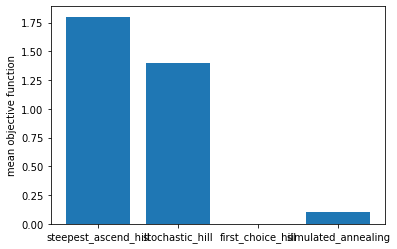

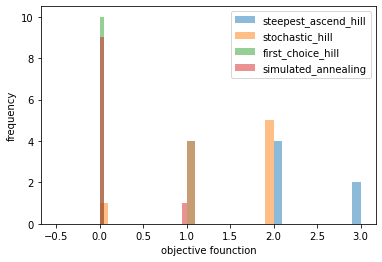

-----Runtime-----
steepest_ascend_hill     5.8483
stochastic_hill         10.0732
first_choice_hill       97.7287
simulated_annealing     99.0864
dtype: float64


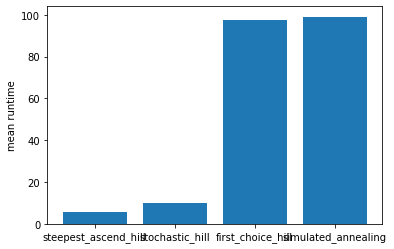

In [26]:
show_performance2(10,10)

---------- 20 * 20 ----------
-----Objective function-----
steepest_ascend_hill    2.3
stochastic_hill         2.2
first_choice_hill       0.0
simulated_annealing     0.5
dtype: float64


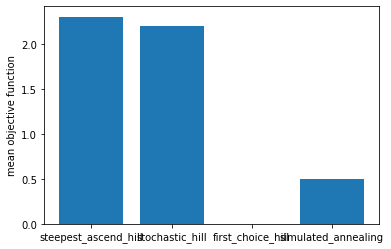

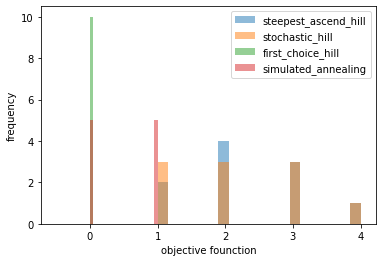

-----Runtime-----
steepest_ascend_hill     85.6566
stochastic_hill         154.0804
first_choice_hill       300.8000
simulated_annealing     304.5282
dtype: float64


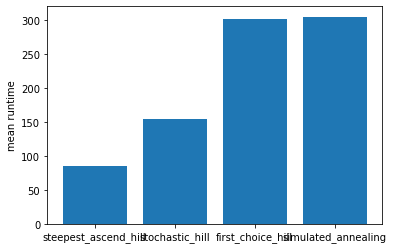

In [27]:
show_performance2(20,10)

---------- 40 * 40 ----------
-----Objective function-----
steepest_ascend_hill    3.3
stochastic_hill         3.3
first_choice_hill       0.4
simulated_annealing     1.3
dtype: float64


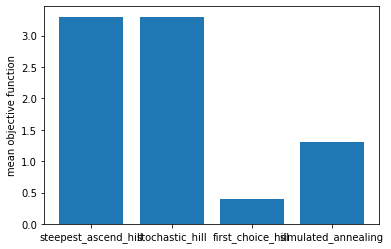

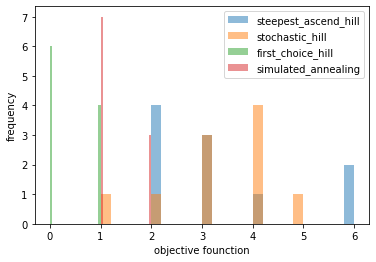

-----Runtime-----
steepest_ascend_hill    1407.1801
stochastic_hill         2557.8670
first_choice_hill       1318.7514
simulated_annealing      624.3974
dtype: float64


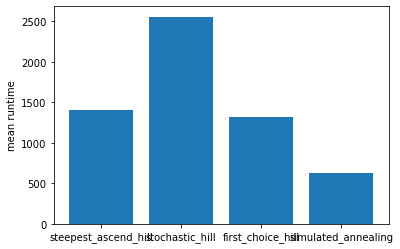

In [28]:
show_performance2(40,10)

---------- 80 * 80 ----------
-----Objective function-----
steepest_ascend_hill    4.6
stochastic_hill         5.0
first_choice_hill       3.0
simulated_annealing     4.1
dtype: float64


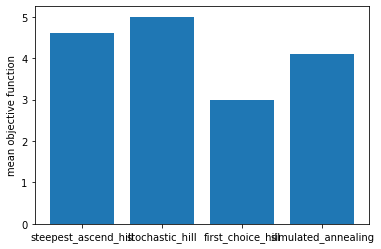

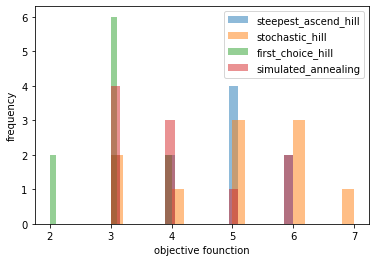

-----Runtime-----
steepest_ascend_hill    21356.5242
stochastic_hill         38412.3403
first_choice_hill        2928.7327
simulated_annealing      1264.5742
dtype: float64


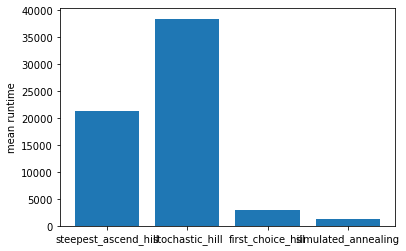

In [29]:
show_performance2(80,10)

__Conclusion:__

From the histogram graph above we can tell that using the above simulated annealing algorithm, we can get better solution than steepest ascend hill climbing and stocastic hill climbing with the lest runtime, which even less than first choice hill climbing. However, it may sometime 'jump' to a bad successor and finally get a worse solution.

## More things to do

Implement a Genetic Algorithm for the n-Queens problem.

In [30]:
# Code and description go here